In [80]:
import re
import pandas as pd
import numpy as np
from collections import defaultdict

# Set Pandas to display all rows of dataframes
pd.set_option('display.max_rows', 500)

# nltk
from nltk import tokenize

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Plotting tools
import matplotlib.pyplot as plt
import matplotlib
plt.style.use('fivethirtyeight')
%matplotlib inline

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

from tqdm import tqdm_notebook as tqdm
from tqdm import trange

In [81]:
analyzer = SentimentIntensityAnalyzer()

In [82]:
cantos = ["Dante_DivineComedy/Inferno/Canto_1.txt"]

In [83]:
with open(cantos[0]) as cantos:
    lines = cantos.read()
    tests = lines.split("\n\n")

In [84]:
tests

["IN the midway of this our mortal life,\nI found me in a gloomy wood, astray\nGone from the path direct: and e'en to tell\nIt were no easy task, how savage wild\nThat forest, how robust and rough its growth,\nWhich to remember only, my dismay\nRenews, in bitterness not far from death.\nYet to discourse of what there good befell,\nAll else will I relate discover'd there.\nHow first I enter'd it I scarce can say,\nSuch sleepy dullness in that instant weigh'd\nMy senses down, when the true path I left,\nBut when a mountain's foot I reach'd, where clos'd\nThe valley, that had pierc'd my heart with dread,\nI look'd aloft, and saw his shoulders broad\nAlready vested with that planet's beam,\nWho leads all wanderers safe through every way.",
 "Then was a little respite to the fear,\nThat in my heart's recesses deep had lain,\nAll of that night, so pitifully pass'd:\nAnd as a man, with difficult short breath,\nForespent with toiling, 'scap'd from sea to shore,\nTurns to the perilous wide wast

In [85]:
for paragraph in tests:
    paragraph = paragraph.replace('\n','')
    print(paragraph)
    vs = analyzer.polarity_scores(paragraph)
    print(vs)
    

IN the midway of this our mortal life,I found me in a gloomy wood, astrayGone from the path direct: and e'en to tellIt were no easy task, how savage wildThat forest, how robust and rough its growth,Which to remember only, my dismayRenews, in bitterness not far from death.Yet to discourse of what there good befell,All else will I relate discover'd there.How first I enter'd it I scarce can say,Such sleepy dullness in that instant weigh'dMy senses down, when the true path I left,But when a mountain's foot I reach'd, where clos'dThe valley, that had pierc'd my heart with dread,I look'd aloft, and saw his shoulders broadAlready vested with that planet's beam,Who leads all wanderers safe through every way.
{'neg': 0.093, 'neu': 0.785, 'pos': 0.122, 'compound': 0.5574}
Then was a little respite to the fear,That in my heart's recesses deep had lain,All of that night, so pitifully pass'd:And as a man, with difficult short breath,Forespent with toiling, 'scap'd from sea to shore,Turns to the per

## Implementing Vader on all of the Cantos Infernos


In [121]:
# Initializing Analyzer
analyzer = SentimentIntensityAnalyzer()

In [122]:
infernos_sentiment = []

In [123]:
import numpy as np

In [124]:
from textblob import TextBlob
import os

for file in os.listdir('Dante_DivineComedy/Inferno/'):
    text = open("Dante_DivineComedy/Inferno/{}".format(file), 'r')
    cantos = TextBlob(' '.join(text.readlines()).strip('\n').strip("\t").lower())
    sentiment = []
    for sentence in cantos.sentences:
        vs = analyzer.polarity_scores(sentence)
        sentiment.append(vs['compound'])

    infernos_sentiment.append(np.mean(sentiment))
            
    

In [125]:
df_inferno = pd.DataFrame()
df_inferno['Sentiment'] = infernos_sentiment / np.linalg.norm(infernos_sentiment)
num_of_cantos = len(infernos_sentiment)
canto_num = np.linspace(1, num_of_cantos, 34)
print(canto_num)
df_inferno['Canto'] = canto_num

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34.]


(1, 34)

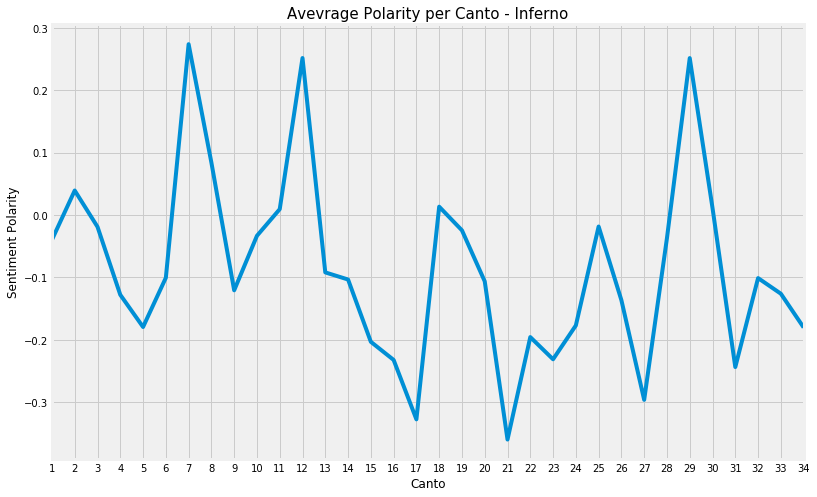

In [126]:
plt.figure(figsize = (12,8))
plt.plot(df_inferno['Canto'], df_inferno['Sentiment'])
plt.title("Avevrage Polarity per Canto - Inferno", fontsize = 15)
plt.xlabel("Canto")
plt.ylabel("Sentiment Polarity")
plt.xticks(np.linspace(1,34,34))
plt.xlim(1,34)

## Purgatorio

In [127]:
purgatorio_sentiment = []

In [128]:
for file in os.listdir('Dante_DivineComedy/Purgatorio/'):
    text = open("Dante_DivineComedy/Purgatorio/{}".format(file), 'r')
    cantos = TextBlob(' '.join(text.readlines()).strip('\n').strip("\t").lower())
    sentiment = []
    for sentence in cantos.sentences:
        vs = analyzer.polarity_scores(sentence)
        sentiment.append(vs['compound'])

    purgatorio_sentiment.append(np.mean(sentiment))
            
    

In [131]:
df_purgatorio = pd.DataFrame()
df_purgatorio['Sentiment'] = purgatorio_sentiment / np.linalg.norm(purgatorio_sentiment)
num_of_cantos = len(purgatorio_sentiment)
canto_num = np.linspace(1, num_of_cantos, 33)
print(canto_num)
df_purgatorio['Canto'] = canto_num

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33.]


(1, 33)

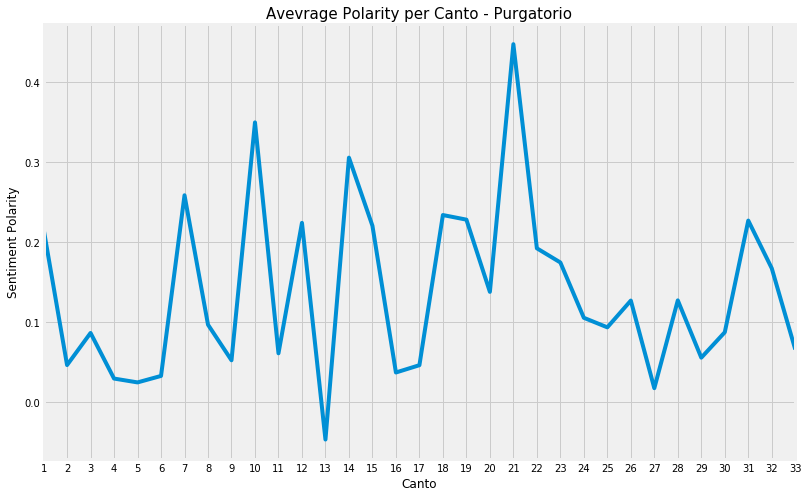

In [133]:
plt.figure(figsize = (12,8))
plt.plot(df_purgatorio['Canto'], df_purgatorio['Sentiment'])
plt.title("Avevrage Polarity per Canto - Purgatorio", fontsize = 15)
plt.xlabel("Canto")
plt.ylabel("Sentiment Polarity")
plt.xticks(np.linspace(1,33,33))
plt.xlim(1,33)

# Paradiso

In [138]:
paradiso_sentement = []

In [139]:
for file in os.listdir('Dante_DivineComedy/Paradiso/'):
    text = open("Dante_DivineComedy/Paradiso/{}".format(file), 'r')
    cantos = TextBlob(' '.join(text.readlines()).strip('\n').strip("\t").lower())
    sentiment = []
    for sentence in cantos.sentences:
        vs = analyzer.polarity_scores(sentence)
        sentiment.append(vs['compound'])

    paradiso_sentement.append(np.mean(sentiment))
            
    

In [142]:
df_paradiso = pd.DataFrame()
df_paradiso['Sentiment'] = paradiso_sentement / np.linalg.norm(paradiso_sentement)
num_of_cantos = len(paradiso_sentement)
canto_num = np.linspace(1, num_of_cantos, 33)
print(canto_num)
df_paradiso['Canto'] = canto_num

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33.]


(1, 33)

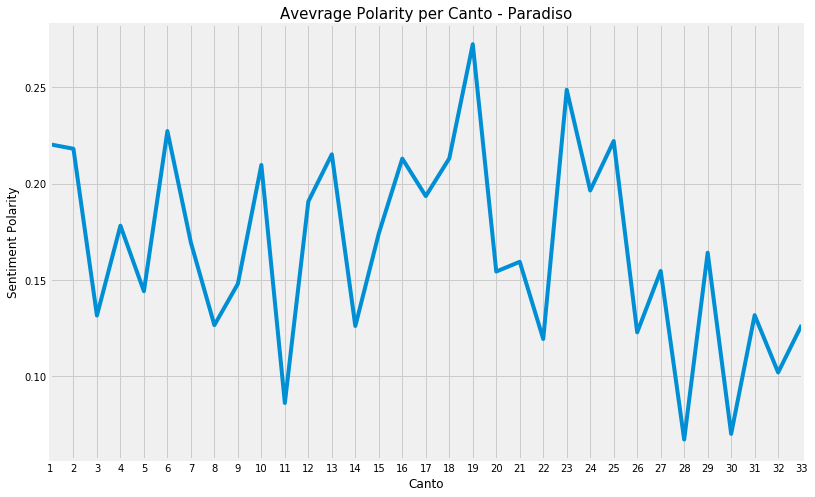

In [143]:
plt.figure(figsize = (12,8))
plt.plot(df_paradiso['Canto'], df_paradiso['Sentiment'])
plt.title("Avevrage Polarity per Canto - Paradiso", fontsize = 15)
plt.xlabel("Canto")
plt.ylabel("Sentiment Polarity")
plt.xticks(np.linspace(1,33,33))
plt.xlim(1,33)